# Modal Training

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
## drop month,day and year
df.drop(['month','day','year'],axis=1,inplace = True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
## Encoding 
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [13]:
# Independent and Dependent Features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [18]:
y_train.shape,y_test.shape

((183,), (61,))

In [19]:
## Features Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658995,-0.251013,-0.344505,0.702034,0.489970,0.383243,0.607763,0.465158,0.514061,0.251823
RH,-0.658995,1.000000,0.230683,0.239433,-0.640490,-0.398049,-0.219443,-0.698857,-0.345916,-0.444177,-0.399453
Ws,-0.251013,0.230683,1.000000,0.223349,-0.161663,-0.001829,0.082730,0.020274,0.034020,-0.076230,-0.235841
Rain,-0.344505,0.239433,0.223349,1.000000,-0.564873,-0.290046,-0.300285,-0.354479,-0.301527,-0.380854,-0.078864
FFMC,0.702034,-0.640490,-0.161663,-0.564873,1.000000,0.597020,0.503788,0.745032,0.587550,0.778048,0.248180
DMC,0.489970,-0.398049,-0.001829,-0.290046,0.597020,1.000000,0.877448,0.654349,0.981948,0.570181,0.204224
DC,0.383243,-0.219443,0.082730,-0.300285,0.503788,0.877448,1.000000,0.498627,0.941407,0.486240,-0.072253
ISI,0.607763,-0.698857,0.020274,-0.354479,0.745032,0.654349,0.498627,1.000000,0.626298,0.738717,0.279701
BUI,0.465158,-0.345916,0.034020,-0.301527,0.587550,0.981948,0.941407,0.626298,1.000000,0.571518,0.099550
Classes,0.514061,-0.444177,-0.076230,-0.380854,0.778048,0.570181,0.486240,0.738717,0.571518,1.000000,0.192316


<Axes: >

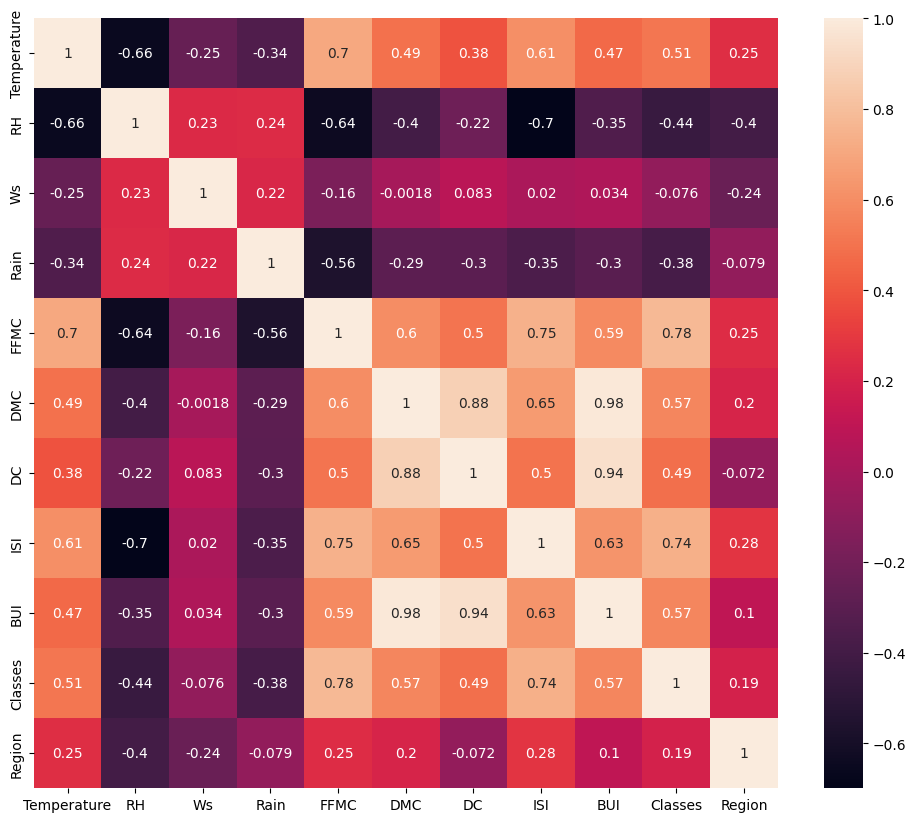

In [20]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [21]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
## threshold: Domain expertise
correlation(X_train,0.85)

{'BUI', 'DC'}

In [23]:
corr_features=correlation(X_train,0.85)

In [24]:
## Drop these features when correlation is more than 0.85.
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

# Feature Scaling or Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [26]:
X_train_scale

array([[-0.80879747,  0.16240659,  1.27764568, ..., -0.78605505,
        -1.14736903, -1.00547949],
       [ 1.07839663, -0.45196291,  0.15791126, ...,  0.83114678,
         0.87155917,  0.99455037],
       [-0.26959916,  0.64024954, -0.58857835, ..., -0.23089621,
         0.87155917,  0.99455037],
       ...,
       [-1.88719411,  0.91330265,  0.53115607, ..., -1.09984047,
        -1.14736903, -1.00547949],
       [ 0.26959916, -0.38369963,  0.15791126, ...,  0.46908667,
         0.87155917,  0.99455037],
       [-0.53919832,  0.98156593,  2.02413529, ..., -0.88260441,
        -1.14736903, -1.00547949]], shape=(183, 9))

In [27]:
X_test_scale

array([[-0.26959916,  0.09414331, -0.21533354, -0.38101065,  0.62495847,
        -0.04597897,  0.22771326,  0.87155917, -1.00547949],
       [ 0.26959916, -0.58848947, -0.96182315, -0.38101065,  0.7283983 ,
        -0.38998609,  0.39667465,  0.87155917, -1.00547949],
       [-1.07839663, -0.31543636,  0.90440087,  0.60577243, -0.96111899,
        -0.92599717, -0.85846707, -1.14736903,  0.99455037],
       [ 0.80879747, -0.65675275,  0.53115607, -0.15674177,  0.17671919,
         0.47403178, -0.49640696,  0.87155917,  0.99455037],
       [ 2.15679327, -1.47591208, -2.08155757, -0.33615687,  0.99044588,
         0.62603493,  1.14493221,  0.87155917,  0.99455037],
       [ 1.88719411,  0.09414331, -2.45480237,  0.15723467, -0.2646241 ,
        -0.24598311, -0.88260441, -1.14736903,  0.99455037],
       [ 1.88719411, -1.61243864, -0.21533354, -0.2913031 ,  0.80425418,
         0.08202367,  0.83114678,  0.87155917,  0.99455037],
       [-0.53919832,  0.70851281, -0.96182315,  1.41314041, -1

## Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'X_train After Scaling')

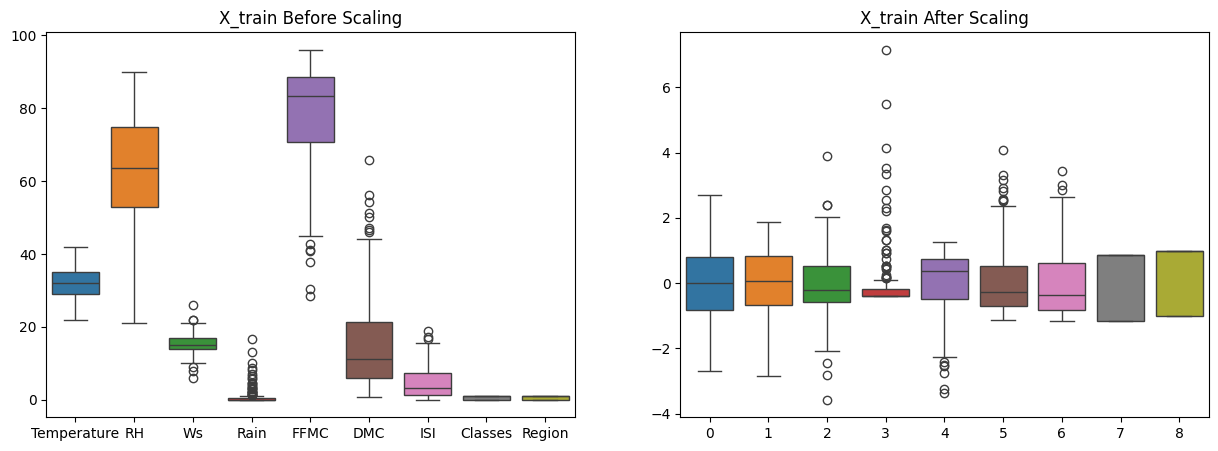

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scale)
plt.title('X_train After Scaling')

# Linear Regression Model

In [29]:
import numpy as np

print(np.isnan(X_train_scale).sum())
print(np.isnan(X_test).sum())

print(np.isnan(y_train).sum())

7
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
ISI            0
Classes        0
Region         0
dtype: int64
1


In [30]:
X_train_scale = X_train_scale[~np.isnan(X_train_scale).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]

y_train= y_train[~np.isnan(y_train)]

Mean Absolute Error: 0.5583
R² Score: 0.9905


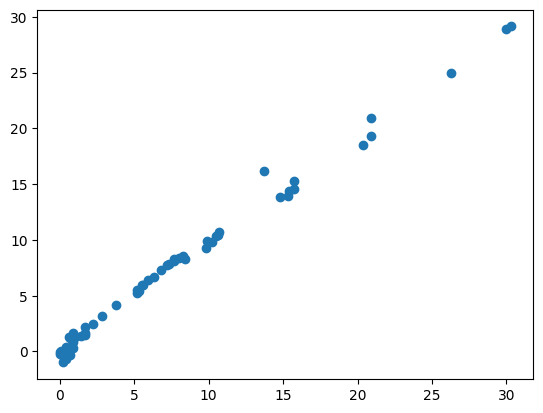

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train_scale, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test_scale)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute Error: 1.2010
R² Score: 0.9525


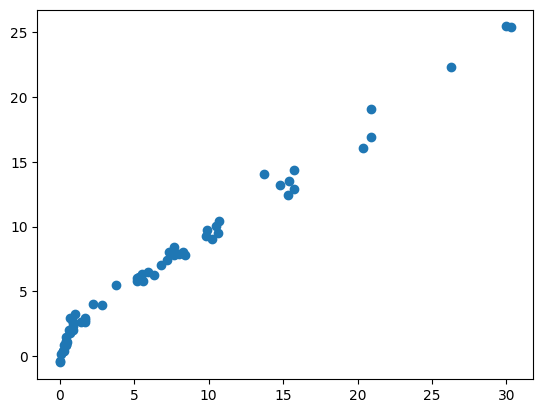

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
lasso = Lasso()
lasso.fit(X_train_scale, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scale)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

plt.scatter(y_test,y_pred)

# Ridge Regression Model

Mean Absolute Error: 0.5818
R² Score: 0.9899


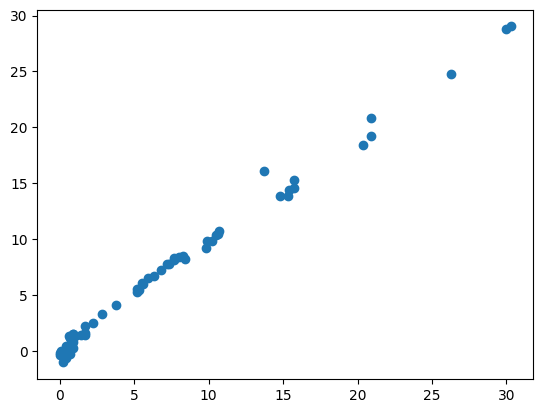

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
ridge = Ridge()
ridge.fit(X_train_scale, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_scale)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

plt.scatter(y_test,y_pred)

# Elastic Regression Model

Mean Absolute Error: 1.8833
R² Score: 0.8817


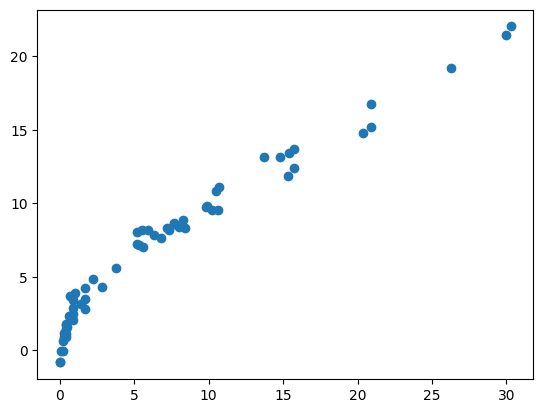

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
elastic = ElasticNet()
elastic.fit(X_train_scale, y_train)

# Predict on the test set
y_pred = elastic.predict(X_test_scale)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

plt.scatter(y_test,y_pred)

# Cross Validation Lasso

In [35]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scale,y_train)

LassoCV(cv=5)

In [36]:
lassocv.predict(X_test_scale)

array([ 8.25711796,  7.74896501, -0.41326235,  6.26660618, 13.89413672,
        1.39271527, 10.66199681, -0.93728404,  1.7888967 , -0.40133144,
        0.50317529,  4.2911898 ,  1.77513151,  1.52159807, 18.35390517,
        5.4908365 , 24.88662438, -0.33992802,  7.36118235, -0.57932542,
        1.72851252,  0.19777279,  8.10454532,  0.18684671, 20.9294296 ,
       -0.10607132,  5.95143589,  9.8269301 ,  5.43071571,  9.89216483,
        8.49461543, -0.55696101, 10.41680345, 14.4931205 ,  1.47625453,
        1.50950513,  0.96507217,  5.90590156, -0.27345353, -0.40719626,
        6.57040207,  0.46884828,  3.19935725, -0.5357485 , 15.29554788,
        8.41642567,  8.44279606,  1.34279272, 10.23661068,  9.26891885,
       28.9191351 ,  2.19879172,  7.96605   , 19.3011185 , 13.83083704,
       16.07725222, 28.78622052, -0.20023862,  2.51554619, 14.3192328 ,
        5.21404451])

In [37]:
lassocv.alpha_

np.float64(0.02525482784545446)

In [38]:
lassocv.alphas_

array([6.70790397, 6.25581369, 5.83419279, 5.44098772, 5.07428336,
       4.73229364, 4.41335289, 4.11590768, 3.83850927, 3.5798066 ,
       3.33853961, 3.11353322, 2.9036915 , 2.70799241, 2.52548278,
       2.3552737 , 2.19653613, 2.04849695, 1.91043511, 1.78167818,
       1.66159903, 1.54961282, 1.4451741 , 1.3477742 , 1.25693873,
       1.17222527, 1.09322121, 1.01954176, 0.95082806, 0.88674543,
       0.82698175, 0.77124595, 0.71926656, 0.6707904 , 0.62558137,
       0.58341928, 0.54409877, 0.50742834, 0.47322936, 0.44133529,
       0.41159077, 0.38385093, 0.35798066, 0.33385396, 0.31135332,
       0.29036915, 0.27079924, 0.25254828, 0.23552737, 0.21965361,
       0.20484969, 0.19104351, 0.17816782, 0.1661599 , 0.15496128,
       0.14451741, 0.13477742, 0.12569387, 0.11722253, 0.10932212,
       0.10195418, 0.09508281, 0.08867454, 0.08269818, 0.0771246 ,
       0.07192666, 0.06707904, 0.06255814, 0.05834193, 0.05440988,
       0.05074283, 0.04732294, 0.04413353, 0.04115908, 0.03838

In [39]:
lassocv.mse_path_

array([[55.39021024, 46.25565519, 57.94323695, 73.35065386, 34.011204  ],
       [49.92749295, 41.28003652, 54.85400342, 70.104321  , 29.82688671],
       [45.11329955, 36.42399336, 47.87917666, 64.04065371, 26.31863376],
       [40.27077183, 32.17803854, 41.75584685, 58.67360623, 22.6718448 ],
       [35.58175865, 28.46422485, 36.43219527, 53.91872308, 19.4566859 ],
       [31.47794066, 25.21466084, 31.80407791, 49.70212595, 16.73613407],
       [27.88469237, 22.37016797, 27.78068454, 45.95916453, 14.4404905 ],
       [24.73712613, 19.87922148, 24.28312072, 41.39622199, 12.50939493],
       [21.97844653, 17.69691409, 21.2426574 , 36.59231396, 10.89145263],
       [19.55990493, 15.78413174, 18.59988096, 32.39035276,  9.54147719],
       [17.43825861, 14.10672157, 16.30277165, 28.71381903,  8.42070849],
       [15.57605793, 12.63497234, 14.30620869, 25.49506959,  7.49569508],
       [13.9406489 , 11.34296077, 12.57095494, 22.67721372,  6.73758503],
       [12.50355397, 10.20808186, 11.0

# Lasso CV

Mean Absolute Error: 0.5940
R² Score: 0.9897


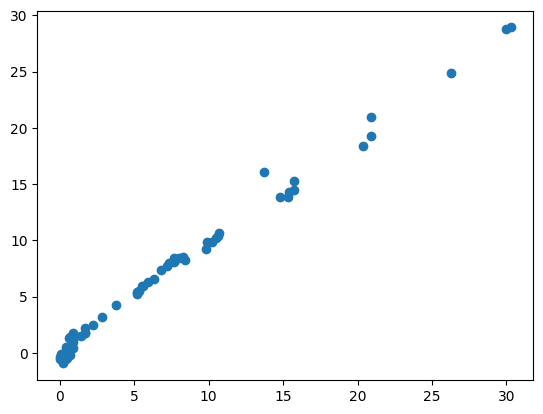

In [40]:
y_pred = lassocv.predict(X_test_scale)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Ridge CV Regression

Mean Absolute Error 0.5817701482604687
R2 score 0.9899204166521427


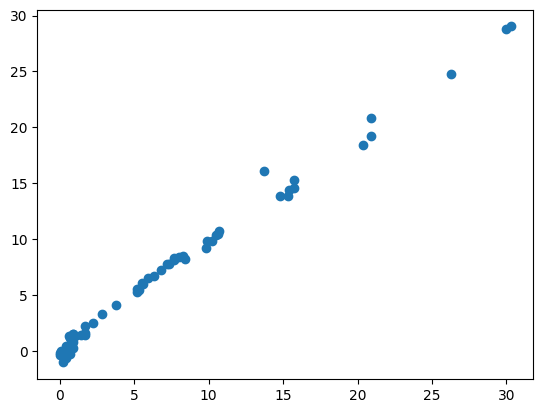

In [41]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scale,y_train)
y_pred = ridgecv.predict(X_test_scale)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error",mae)
print("R2 score",r2)

In [42]:
ridgecv.alpha_

np.float64(1.0)

In [43]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [44]:
ridgecv.coef_

array([-1.16230834e-04, -1.39336950e-01,  6.43985664e-02, -4.53933100e-02,
       -7.78570722e-01,  3.56906848e+00,  4.54654668e+00,  5.14100822e-01,
       -4.06510290e-01])

In [45]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# ElasticNet CV

Mean Absolute Error 0.6176724485150408
R2 score 0.9890678669434891


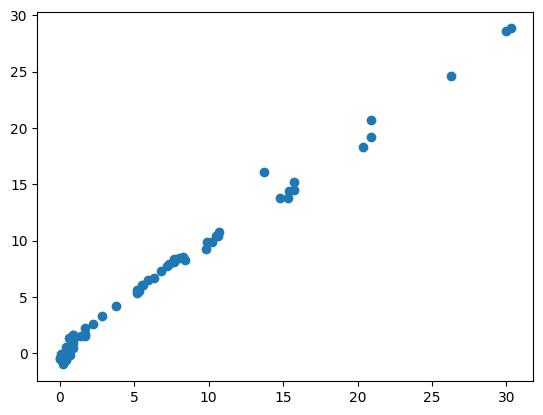

In [46]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scale,y_train)
y_pred = elasticcv.predict(X_test_scale)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error",mae)
print("R2 score",r2)

In [47]:
elasticcv.alpha_

np.float64(0.0203908351749969)

In [48]:
elasticcv.alphas_

array([13.41580794, 12.51162739, 11.66838558, 10.88197544, 10.14856672,
        9.46458729,  8.82670578,  8.23181535,  7.67701855,  7.15961319,
        6.67707923,  6.22706643,  5.807383  ,  5.41598482,  5.05096557,
        4.71054739,  4.39307227,  4.0969939 ,  3.82087022,  3.56335636,
        3.32319806,  3.09922564,  2.8903482 ,  2.69554841,  2.51387747,
        2.34445054,  2.18644242,  2.03908352,  1.90165611,  1.77349086,
        1.65396351,  1.5424919 ,  1.43853311,  1.34158079,  1.25116274,
        1.16683856,  1.08819754,  1.01485667,  0.94645873,  0.88267058,
        0.82318154,  0.76770185,  0.71596132,  0.66770792,  0.62270664,
        0.5807383 ,  0.54159848,  0.50509656,  0.47105474,  0.43930723,
        0.40969939,  0.38208702,  0.35633564,  0.33231981,  0.30992256,
        0.28903482,  0.26955484,  0.25138775,  0.23444505,  0.21864424,
        0.20390835,  0.19016561,  0.17734909,  0.16539635,  0.15424919,
        0.14385331,  0.13415808,  0.12511627,  0.11668386,  0.10

## Pickle the machine Learning Models,preprocessing model standardscaler

In [49]:
scaler

StandardScaler()

In [50]:
ridge

Ridge()

In [51]:
import pickle

In [52]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))